# Dimensionality Reduction Techniques on MNIST dataset


In [ ]:
# Dimensionality Reduction Techniques on MNIST dataset
# PCA, Gaussian Random Projection, Sparse Random Projection
# Machine Learning Algorithms: Logistic Regression, Support Vector Machine, Naive Bayes, Random Forest, K-NN, Descision Trees

# Import Libraries

In [ ]:
# Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load and Preprocess the Data

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)


# Standardize the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train_standardized, X_test_standardized, y_train_full, y_test_reduced = train_test_split(
    X, y, train_size=30000, test_size=5000, random_state=42, stratify=y)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# visualize the MNIST data in a 3D plot

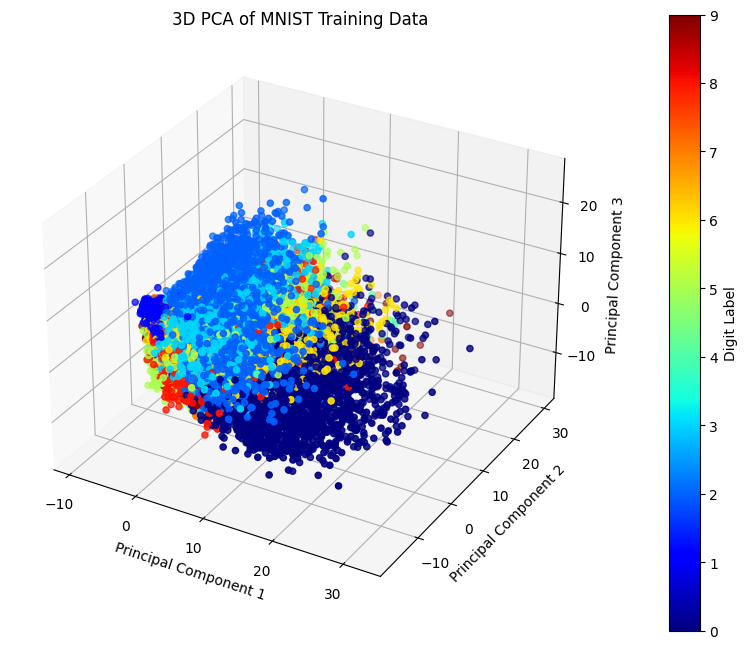

In [ ]:
# Apply PCA with n_components=3 for 3D visualization on the standardized training data
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_standardized)

# Plotting the 3D scatter plot using the transformed training data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the first three principal components
scatter = ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train_full, cmap='jet', marker='o')

# Color bar for the labels
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Digit Label')

# Set labels for axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set title
plt.title('3D PCA of MNIST Training Data')

# Show plot
plt.show()


# Johnson-Lindenstrauss Lemma Formula

In [ ]:
import math

def calculate_q(n, epsilon):
    if epsilon <= 0 or epsilon >= 1:
        raise ValueError("Epsilon must be between 0 and 1, non-inclusive.")

    # Apply the Johnson-Lindenstrauss lemma formula
    q = math.ceil(24 * math.log10(n) / ((3 * epsilon**2) - (2 * epsilon**3)))
    return q

# Define the parameters
n = 30000
epsilon_values = [0.1, 0.2, 0.5]

# Calculate and print the results for each epsilon value
results = {}
for epsilon in epsilon_values:
    try:
        q = calculate_q(n, epsilon)
        results[epsilon] = q
        print(f"For epsilon = {epsilon:.4f}, the reduced dimensionq q is: {q}")
    except ValueError as e:
        print(f"Error: {e}")
results


For epsilon = 0.1000, the reduced dimensionq q is: 3838
For epsilon = 0.2000, the reduced dimensionq q is: 1034
For epsilon = 0.5000, the reduced dimensionq q is: 215


{0.1: 3838, 0.2: 1034, 0.5: 215}

# PCA on MNIST Dataset with n_components 784 and 215 (Features)

Time taken for PCA with 784 components: 6.57 seconds
Explained Variance Ratio with 784 components: 1.00
Time taken for PCA with 215 components: 4.70 seconds
Explained Variance Ratio with 215 components: 0.90


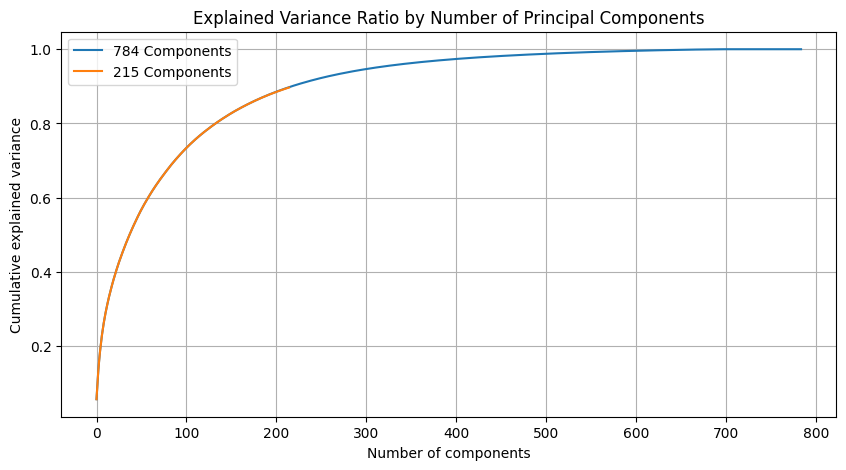

In [ ]:
# Apply PCA with n_components=784 (which is the full dimensionality) to visualize explained variance
start_time_784 = time()
pca_784 = PCA(n_components=784)
pca_784.fit(X_train_standardized)
end_time_784 = time()
time_784 = end_time_784 - start_time_784
explained_variance_784 = np.sum(pca_784.explained_variance_ratio_)
print(f"Time taken for PCA with 784 components: {time_784:.2f} seconds")
print(f"Explained Variance Ratio with 784 components: {explained_variance_784:.2f}")

# Apply PCA with n_components=215 to compare variance
start_time_215 = time()
pca_215 = PCA(n_components=215)
pca_215.fit(X_train_standardized)
end_time_215 = time()
time_215 = end_time_215 - start_time_215
explained_variance_215 = np.sum(pca_215.explained_variance_ratio_)
print(f"Time taken for PCA with 215 components: {time_215:.2f} seconds")
print(f"Explained Variance Ratio with 215 components: {explained_variance_215:.2f}")

# Visualizing the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_784.explained_variance_ratio_), label='784 Components')
plt.plot(np.cumsum(pca_215.explained_variance_ratio_), label='215 Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

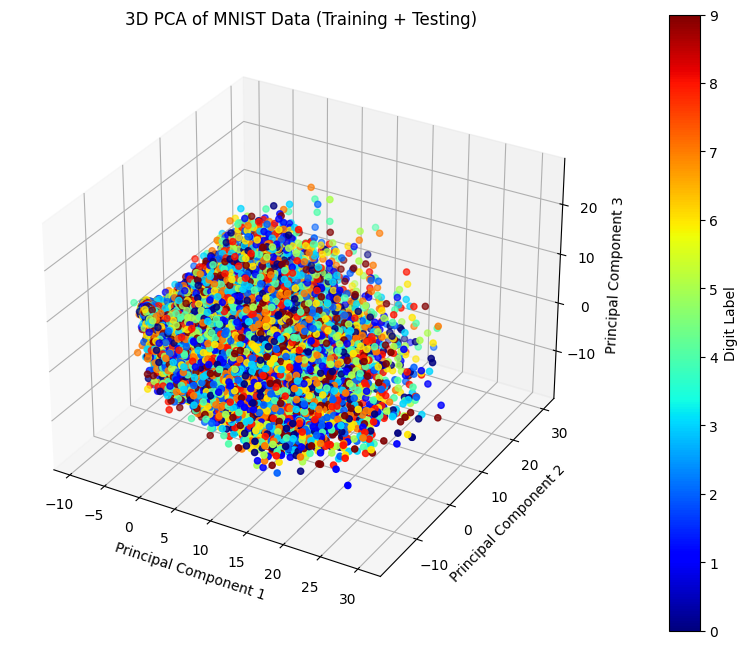

In [ ]:
# First, fit PCA on the entire standardized dataset with 215 components
pca_215_full = PCA(n_components=215)
X_pca_215_full = pca_215_full.fit_transform(scaler.fit_transform(X))

# Now we'll split this into training and testing sets, based on the original train-test split
X_train_pca_215 = X_pca_215_full[:30000]
X_test_pca_215 = X_pca_215_full[30000:35000]

# Reduce to 3 components for visualization
pca_3 = PCA(n_components=3)

X_train_pca_3 = pca_3.fit_transform(X_train_pca_215)
X_test_pca_3 = pca_3.transform(X_test_pca_215)

# Combine the reduced training and testing sets for visualization
X_pca_3_combined = np.vstack((X_train_pca_3, X_test_pca_3))
y_combined = np.hstack((y_train_full, y_test_reduced))

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the first three principal components
scatter = ax.scatter(X_pca_3_combined[:, 0], X_pca_3_combined[:, 1], X_pca_3_combined[:, 2],
                     c=y_combined, cmap='jet', marker='o')

# Color bar for the labels
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Digit Label')

# Set labels for axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set title
plt.title('3D PCA of MNIST Data (Training + Testing)')

# Show plot
plt.show()


# Random Projection (RP) on MNIST

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

# Combine the standardized training and testing data
X_standardized = np.vstack((X_train_standardized, X_test_standardized))

# First, let's define our full-dimensional RP transformer
rp_784 = GaussianRandomProjection(n_components=784)

# Apply RP with 784 components and time it
start_time_rp_784 = time()
X_rp_784 = rp_784.fit_transform(X_standardized)
end_time_rp_784 = time()
time_rp_784 = end_time_rp_784 - start_time_rp_784
print(f"Time taken for RP with 784 components: {time_rp_784:.2f} seconds")

# Now let's define our RP transformer with 215 components
rp_215 = GaussianRandomProjection(n_components=215)

# Apply RP with 215 components and time it
start_time_rp_215 = time()
X_rp_215 = rp_215.fit_transform(X_standardized)
end_time_rp_215 = time()
time_rp_215 = end_time_rp_215 - start_time_rp_215
print(f"Time taken for RP with 215 components: {time_rp_215:.2f} seconds")


Time taken for RP with 784 components: 0.97 seconds
Time taken for RP with 215 components: 0.34 seconds


Time taken for RP with 215 components: 0.37 seconds


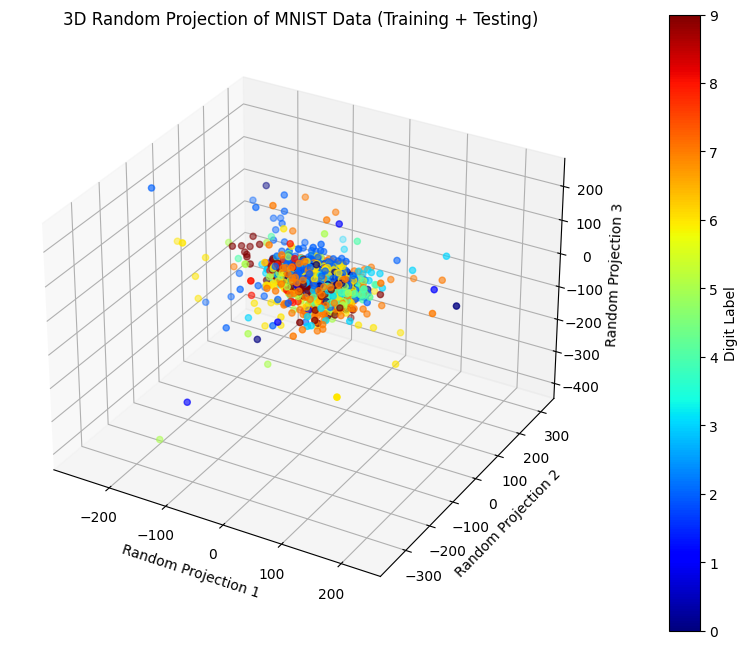

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
n_components_rp = 215
rp = GaussianRandomProjection(n_components=n_components_rp)

# Apply RP with n_components_rp components to the training data and time it
start_time_rp = time()
rp.fit(X_train_standardized)
X_train_rp = rp.transform(X_train_standardized)
X_test_rp = rp.transform(X_test_standardized)
end_time_rp = time()
time_rp = end_time_rp - start_time_rp
print(f"Time taken for RP with {n_components_rp} components: {time_rp:.2f} seconds")

# Reduce to 3 components for visualization using another instance of RP if needed
rp_3 = GaussianRandomProjection(n_components=3)
X_train_rp_3 = rp_3.fit_transform(X_train_standardized)
X_test_rp_3 = rp_3.transform(X_test_standardized)

# Combine the reduced training and testing sets for visualization
X_rp_3_combined = np.vstack((X_train_rp_3, X_test_rp_3))
y_combined = np.hstack((y_train_full, y_test_reduced))

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the first three components from RP
scatter = ax.scatter(X_rp_3_combined[:, 0], X_rp_3_combined[:, 1], X_rp_3_combined[:, 2],
                     c=y_combined, cmap='jet', marker='o')

# Color bar for the labels
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Digit Label')

# Set labels for axes
ax.set_xlabel('Random Projection 1')
ax.set_ylabel('Random Projection 2')
ax.set_zlabel('Random Projection 3')

# Set title
plt.title('3D Random Projection of MNIST Data (Training + Testing)')

# Show plot
plt.show()


# Johnson-Lindenstrauss Lemma Formula

In [ ]:
import math

def calculate_q(n, epsilon):
    if epsilon <= 0 or epsilon >= 1:
        raise ValueError("Epsilon must be between 0 and 1, non-inclusive.")

    # Apply the Johnson-Lindenstrauss lemma formula
    q = math.ceil(24 * math.log10(n) / ((3 * epsilon**2) - (2 * epsilon**3)))
    return q

# Define the parameters
n = 30000
epsilon_values = [0.1, 0.2, 0.5]

# Calculate and print the results for each epsilon value
results = {}
for epsilon in epsilon_values:
    try:
        q = calculate_q(n, epsilon)
        results[epsilon] = q
        print(f"For epsilon = {epsilon:.4f}, the reduced dimensionq q is: {q}")
    except ValueError as e:
        print(f"Error: {e}")
results


For epsilon = 0.1000, the reduced dimensionq q is: 3838
For epsilon = 0.2000, the reduced dimensionq q is: 1034
For epsilon = 0.5000, the reduced dimensionq q is: 215


{0.1: 3838, 0.2: 1034, 0.5: 215}

#  Defining Machine Learning Models

# Logistic Regression on MNIST

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Transform the training and testing data with PCA
pca_215 = PCA(n_components=215)
X_train_pca_215 = pca_215.fit_transform(X_train_standardized)
X_test_pca_215 = pca_215.transform(X_test_standardized)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Fit the model on the PCA-transformed training data
logistic_regression_model.fit(X_train_pca_215, y_train_full)

# Make predictions on the PCA-transformed test set
y_pred = logistic_regression_model.predict(X_test_pca_215)

# Calculate the performance metrics
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted', labels=np.unique(y_pred))
recall = recall_score(y_test_reduced, y_pred, average='weighted', labels=np.unique(y_pred))
f1 = f1_score(y_test_reduced, y_pred, average='weighted', labels=np.unique(y_pred))
accuracy = accuracy_score(y_test_reduced, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Full classification report
full_report = classification_report(y_test_reduced, y_pred, labels=np.unique(y_pred))
print("\nFull Classification Report:\n", full_report)

Confusion Matrix:
 [[476   0   2   2   4   3   2   1   3   0]
 [  0 548   3   3   1   2   0   0   6   0]
 [  3   8 446  10   8   5   2   8   9   0]
 [  0   3   8 453   2  22   3   4  10   5]
 [  1   1   5   1 459   1   1   2   2  15]
 [  6   4   3  16   6 398   6   2   7   3]
 [  2   0   5   0   3   8 465   0   8   0]
 [  1   3   6   3   5   1   1 481   2  18]
 [  2   9   5  11   5  20   0   3 426   6]
 [  4   0   1   4  15   1   0  14   8 450]]
Precision: 0.9205
Recall: 0.9204
F1 Score: 0.9204
Accuracy: 0.9204

Full Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       493
           1       0.95      0.97      0.96       563
           2       0.92      0.89      0.91       499
           3       0.90      0.89      0.89       510
           4       0.90      0.94      0.92       488
           5       0.86      0.88      0.87       451
           6       0.97      0.95      0.96       491
           7       0

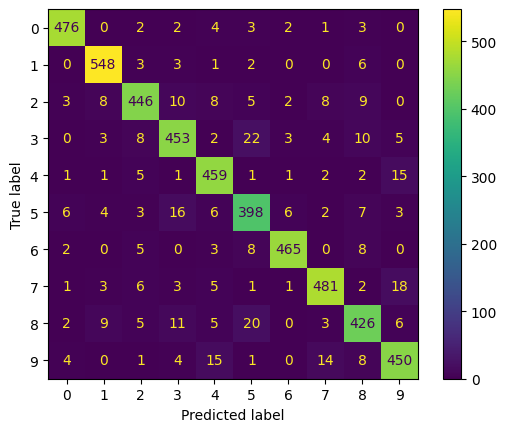

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])

cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/logistic_regression_model.pkl','wb') as file:
  pickle.dump(logistic_regression_model,file)

# SVM on MNIST

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Initialize the SVM classifier
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train_pca_215, y_train_full)

# Predictions on test set
y_pred_svm = svm_model.predict(X_test_pca_215)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_test_reduced, y_pred_svm)
precision_svm = precision_score(y_test_reduced, y_pred_svm, average='weighted', labels=np.unique(y_pred_svm))
recall_svm = recall_score(y_test_reduced, y_pred_svm, average='weighted', labels=np.unique(y_pred_svm))
f1_svm = f1_score(y_test_reduced, y_pred_svm, average='weighted', labels=np.unique(y_pred_svm))
accuracy_svm = accuracy_score(y_test_reduced, y_pred_svm)

# Print the evaluation results
print("SVM Classifier Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix_svm)
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Accuracy: {accuracy_svm:.4f}")

# Full classification report
full_report_svm = classification_report(y_test_reduced, y_pred_svm, labels=np.unique(y_pred_svm))
print("\nFull Classification Report for SVM:\n", full_report_svm)


SVM Classifier Evaluation Metrics:
Confusion Matrix:
 [[486   0   2   1   0   1   3   0   0   0]
 [  0 554   3   1   1   0   0   2   1   1]
 [  2   1 480   7   0   0   2   7   0   0]
 [  0   4   6 475   1   5   0   6  10   3]
 [  0   1   4   0 474   0   0   2   1   6]
 [  2   1   0   4   1 434   1   6   1   1]
 [  1   0   3   0   0   4 474   4   5   0]
 [  0   2   4   2   5   0   0 501   0   7]
 [  1   3   5   3   2   7   2   3 459   2]
 [  2   0   1   2  12   1   0   7   1 471]]
Precision: 0.9618
Recall: 0.9616
F1 Score: 0.9616
Accuracy: 0.9616

Full Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       493
           1       0.98      0.98      0.98       563
           2       0.94      0.96      0.95       499
           3       0.96      0.93      0.95       510
           4       0.96      0.97      0.96       488
           5       0.96      0.96      0.96       451
           6       0.98      0.

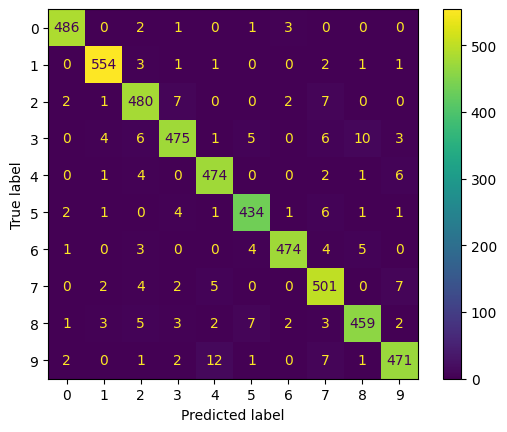

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=[0,1,2,3,4,5,6,7,8,9])

# Plot the confusion matrix
cm_display.plot()
plt.show()


In [ ]:
with open('/content/drive/My Drive/PCA_RP/svm_model.pkl','wb') as file:
  pickle.dump(svm_model,file)

# Naive Bayes on MNIST

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train_pca_215, y_train_full)

# Predictions on test set
y_pred_nb = nb_model.predict(X_test_pca_215)

# Evaluate the model
conf_matrix_nb = confusion_matrix(y_test_reduced, y_pred_nb)
precision_nb = precision_score(y_test_reduced, y_pred_nb, average='weighted', labels=np.unique(y_pred_nb))
recall_nb = recall_score(y_test_reduced, y_pred_nb, average='weighted', labels=np.unique(y_pred_nb))
f1_nb = f1_score(y_test_reduced, y_pred_nb, average='weighted', labels=np.unique(y_pred_nb))
accuracy_nb = accuracy_score(y_test_reduced, y_pred_nb)

# Print the evaluation results
print("Naive Bayes Classifier Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix_nb)
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"Accuracy: {accuracy_nb:.4f}")

# Full classification report
full_report_nb = classification_report(y_test_reduced, y_pred_nb, labels=np.unique(y_pred_nb))
print("\nFull Classification Report for Naive Bayes:\n", full_report_nb)


Naive Bayes Classifier Evaluation Metrics:
Confusion Matrix:
 [[452   0  14   5  10   6   2   0   3   1]
 [  1 531   4   1  12   2   0   0  12   0]
 [ 23   5 169  46 135   4   2   4 108   3]
 [184  13  44 103  33   2   0   2 120   9]
 [  0  20  26   8 413   5   1   9   2   4]
 [ 66  10  28  14  70 107   9   2 137   8]
 [128   4  19   9 145  14 139   0  32   1]
 [ 37  28   9   9 125   4   0 118  10 181]
 [ 15  38  27   8  18  10   1   0 368   2]
 [ 10  24  14   1 199   0   0  22   8 219]]
Precision: 0.5967
Recall: 0.5238
F1 Score: 0.4912
Accuracy: 0.5238

Full Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.49      0.92      0.64       493
           1       0.79      0.94      0.86       563
           2       0.48      0.34      0.40       499
           3       0.50      0.20      0.29       510
           4       0.36      0.85      0.50       488
           5       0.69      0.24      0.35       451
           6   

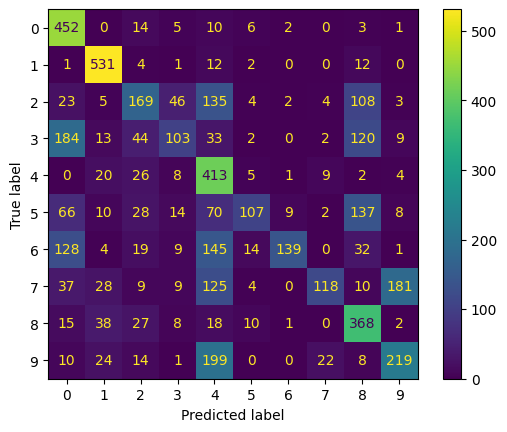

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_nb, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/nb_model.pkl','wb') as file:
  pickle.dump(nb_model,file)

# Random Forest on MNIST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Initialize the Random Forest model with 215 estimators
rf_model = RandomForestClassifier(n_estimators=215, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_pca_215, y_train_full)

# Predictions on test set
y_pred_rf = rf_model.predict(X_test_pca_215)

# Evaluate the model
conf_matrix_rf = confusion_matrix(y_test_reduced, y_pred_rf)
precision_rf = precision_score(y_test_reduced, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_reduced, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_reduced, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test_reduced, y_pred_rf)

# Print the evaluation results
print("Random Forest Classifier Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix_rf)
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")

# Full classification report
full_report_rf = classification_report(y_test_reduced, y_pred_rf)
print("\nFull Classification Report for Random Forest:\n", full_report_rf)


Random Forest Classifier Evaluation Metrics:
Confusion Matrix:
 [[483   0   1   1   0   4   4   0   0   0]
 [  0 552   4   3   1   0   1   0   2   0]
 [  2   0 470   9   2   0   3   6   4   3]
 [  0   2  13 466   0   4   2   9  10   4]
 [  0   1   4   0 461   2   0   4   0  16]
 [  5   0   1  21   3 411   2   3   3   2]
 [  1   0   6   0   0  10 472   0   2   0]
 [  1   2   5   3   7   2   0 491   0  10]
 [  1   1   4  15   2  12   0   2 441   9]
 [  4   0   3   5  19   0   0  19   3 444]]
Precision: 0.9385
Recall: 0.9382
F1 Score: 0.9382
Accuracy: 0.9382

Full Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       493
           1       0.99      0.98      0.98       563
           2       0.92      0.94      0.93       499
           3       0.89      0.91      0.90       510
           4       0.93      0.94      0.94       488
           5       0.92      0.91      0.92       451
           

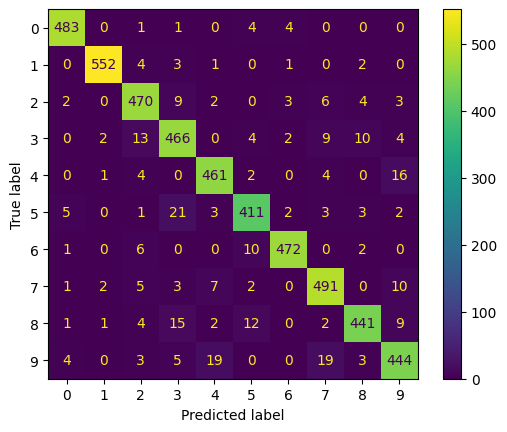

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_rf, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/rf_model.pkl','wb') as file:
  pickle.dump(rf_model,file)

# Descision Tree on MNIST

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_pca_215, y_train_full)

# Predictions on test set
y_pred_dt = dt_model.predict(X_test_pca_215)

# Evaluate the model
conf_matrix_dt = confusion_matrix(y_test_reduced, y_pred_dt)
precision_dt = precision_score(y_test_reduced, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_reduced, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_reduced, y_pred_dt, average='weighted')
accuracy_dt = accuracy_score(y_test_reduced, y_pred_dt)

# Print the evaluation results
print("Decision Tree Classifier Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix_dt)
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Accuracy: {accuracy_dt:.4f}")

# Full classification report
full_report_dt = classification_report(y_test_reduced, y_pred_dt)
print("\nFull Classification Report for Decision Tree:\n", full_report_dt)


Decision Tree Classifier Evaluation Metrics:
Confusion Matrix:
 [[439   0   5   2   4  13  15   3   6   6]
 [  1 530   6   4   3   4   4   5   4   2]
 [ 12   4 393  24   8  15  12   8  20   3]
 [ 11   4  24 386   4  27   3  10  30  11]
 [  6   3  17   5 373   8   7  20  10  39]
 [ 12   2   9  38  10 323   5   8  29  15]
 [ 14   4  13   2   8  15 423   2   9   1]
 [  4   4  11   7   9   5   2 435   7  37]
 [  8   9  24  34  11  24   8  12 344  13]
 [  4   1   3   4  39   9   2  34  16 385]]
Precision: 0.8060
Recall: 0.8062
F1 Score: 0.8060
Accuracy: 0.8062

Full Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       493
           1       0.94      0.94      0.94       563
           2       0.78      0.79      0.78       499
           3       0.76      0.76      0.76       510
           4       0.80      0.76      0.78       488
           5       0.73      0.72      0.72       451
           

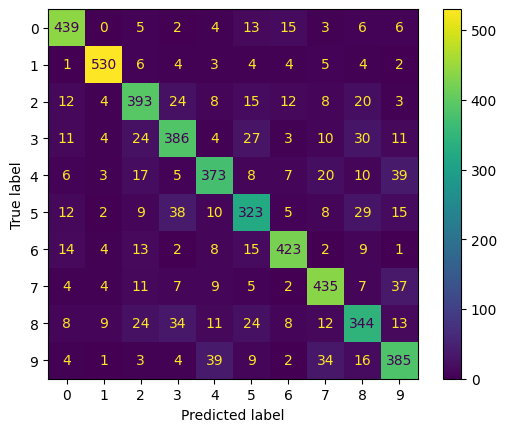

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_dt, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/dt_model.pkl','wb') as file:
  pickle.dump(dt_model,file)

# k-NN on MNIST

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Initialize the KNN model with 10 neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)

# Fit the model on the training data
knn_model.fit(X_train_pca_215, y_train_full)

# Predictions on test set
y_pred_knn = knn_model.predict(X_test_pca_215)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test_reduced, y_pred_knn)
precision_knn = precision_score(y_test_reduced, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test_reduced, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_reduced, y_pred_knn, average='weighted')
accuracy_knn = accuracy_score(y_test_reduced, y_pred_knn)

# Print the evaluation results
print("K-Nearest Neighbors Classifier Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix_knn)
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Accuracy: {accuracy_knn:.4f}")

# Full classification report
full_report_knn = classification_report(y_test_reduced, y_pred_knn)
print("\nFull Classification Report for KNN:\n", full_report_knn)


K-Nearest Neighbors Classifier Evaluation Metrics:
Confusion Matrix:
 [[483   0   1   2   0   4   3   0   0   0]
 [  0 558   3   0   1   0   1   0   0   0]
 [  5   3 458  10   1   1   7   8   4   2]
 [  1   5   5 473   2   6   1   4   8   5]
 [  0   2   2   1 467   2   0   0   0  14]
 [  6   1   1  18   2 410   7   0   0   6]
 [  8   0   2   0   0  10 470   0   1   0]
 [  0   7   6   2   1   1   0 492   0  12]
 [  3   6   5  11   3  19   0   2 432   6]
 [  3   0   1   4  11   0   0  19   2 457]]
Precision: 0.9403
Recall: 0.9400
F1 Score: 0.9399
Accuracy: 0.9400

Full Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       493
           1       0.96      0.99      0.97       563
           2       0.95      0.92      0.93       499
           3       0.91      0.93      0.92       510
           4       0.96      0.96      0.96       488
           5       0.91      0.91      0.91       451
           6   

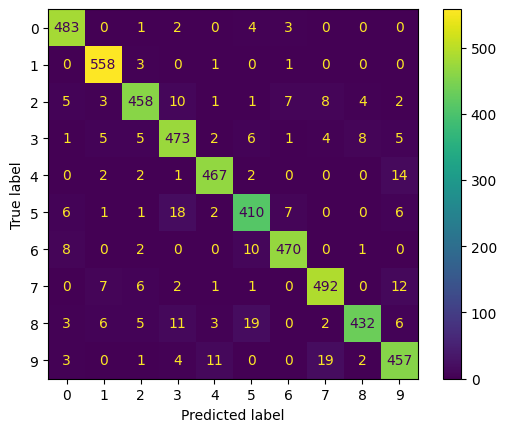

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/knn_model.pkl','wb') as file:
  pickle.dump(knn_model,file)

# Creating Pipeline PCA reduced data for applying ML techniques

In [ ]:
# Creating Pipeline PCA reduced data for applying ML techniques

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Define the PCA
pca = PCA(n_components=215)

# Define the pipelines with specific names for each ML model
pipeline_pca_lr = Pipeline([('pca', pca), ('classifier', LogisticRegression(max_iter=1000))])
pipeline_pca_knn = Pipeline([('pca', pca), ('classifier', KNeighborsClassifier(n_neighbors=10))])
pipeline_pca_svm = Pipeline([('pca', pca), ('classifier', SVC())])
pipeline_pca_dt = Pipeline([('pca', pca), ('classifier', DecisionTreeClassifier())])
pipeline_pca_rf = Pipeline([('pca', pca), ('classifier', RandomForestClassifier(n_estimators=215))])
pipeline_pca_nb = Pipeline([('pca', pca), ('classifier', GaussianNB())])


# PCA_Logistic_Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from time import time

# Binarize the labels for multi-class ROC AUC
y_train_binarized = label_binarize(y_train_full, classes=np.unique(y_train_full))
y_test_binarized = label_binarize(y_test_reduced, classes=np.unique(y_test_reduced))

# Define the PCA and Logistic Regression pipeline
pipeline_pca_lr = Pipeline([
    ('pca', PCA(n_components=215)),
    ('logistic_regression', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
])

# Start timing
start_time = time()

# Train the pipeline
pipeline_pca_lr.fit(X_train_pca_215, y_train_binarized)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = pipeline_pca_lr.predict(X_test_pca_215)
y_pred_proba = pipeline_pca_lr.predict_proba(X_test_pca_215)

# Calculate performance metrics
accuracy = accuracy_score(y_test_binarized, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, np.argmax(y_pred, axis=1))
precision = precision_score(y_test_binarized, y_pred, average='weighted')
recall = recall_score(y_test_binarized, y_pred, average='weighted')
f1 = f1_score(y_test_binarized, y_pred, average='weighted')
auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Training time: 41.93 seconds
Accuracy: 0.8324
Confusion Matrix:
 [[488   0   0   1   1   2   1   0   0   0]
 [ 14 542   2   1   1   1   0   0   2   0]
 [ 43   8 433   1   4   1   1   4   3   1]
 [ 47   4   5 433   2  10   2   1   3   3]
 [ 32   2   1   1 447   0   1   0   2   2]
 [ 79   3   0  13   5 347   1   1   1   1]
 [ 36   0   6   0   3   6 439   0   1   0]
 [ 27   3   4   5   6   1   0 470   1   4]
 [122   5   0   4   1  13   0   2 338   2]
 [ 75   0   0   1  19   1   0  13   4 384]]
Precision: 0.9198
Recall: 0.8726
F1 Score: 0.8948
AUC: 0.9853


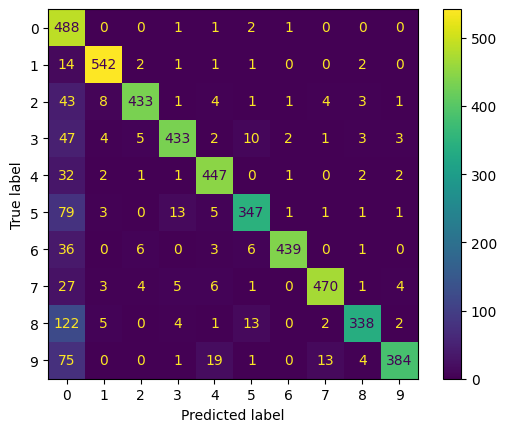

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, np.argmax(y_pred, axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_pca_lr.pkl', 'wb') as file:
    pickle.dump(pipeline_pca_lr, file)

# PCA_SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from time import time

# Define the PCA and SVM pipeline
pipeline_pca_svm = Pipeline([
    ('pca', PCA(n_components=215)),
    ('svm', SVC(probability=True))
])

# Start timing
start_time = time()

# Train the pipeline
pipeline_pca_svm.fit(X_train_pca_215, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = pipeline_pca_svm.predict(X_test_pca_215)
y_pred_proba = pipeline_pca_svm.predict_proba(X_test_pca_215)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training time: 172.98 seconds


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_pca_svm.pkl', 'wb') as file:
    pickle.dump(pipeline_pca_svm, file)

# PCA_Naive_Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
from time import time

# Binarize the labels for multi-class ROC AUC
y_train_binarized = label_binarize(y_train_full, classes=np.unique(y_train_full))
y_test_binarized = label_binarize(y_test_reduced, classes=np.unique(y_test_reduced))

# Define the PCA and Naive Bayes pipeline
pipeline_pca_nb = Pipeline([
    ('pca', PCA(n_components=215)),
    ('naive_bayes', GaussianNB())
])

# Start timing
start_time = time()

# Train the pipeline
pipeline_pca_nb.fit(X_train_full, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = pipeline_pca_nb.predict(X_test_reduced)
y_pred_proba = pipeline_pca_nb.predict_proba(X_test_reduced)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
recall = recall_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
f1 = f1_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()


In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_pca_nb.pkl', 'wb') as file:
    pickle.dump(pipeline_pca_nb, file)

# PCA_Random_Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
from time import time

# Binarize the labels for multi-class ROC AUC
y_train_binarized = label_binarize(y_train_full, classes=np.unique(y_train_full))
y_test_binarized = label_binarize(y_test_reduced, classes=np.unique(y_test_reduced))

# Define the PCA and Random Forest pipeline
pipeline_pca_rf = Pipeline([
    ('pca', PCA(n_components=215)),
    ('random_forest', RandomForestClassifier(n_estimators=100))
])

# Start timing
start_time = time()

# Train the pipeline
pipeline_pca_rf.fit(X_train_full, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = pipeline_pca_rf.predict(X_test_reduced)
y_pred_proba = pipeline_pca_rf.predict_proba(X_test_reduced)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
recall = recall_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
f1 = f1_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()


In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_pca_rf.pkl', 'wb') as file:
    pickle.dump(pipeline_pca_rf, file)

# PCA_Decisiom_Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
from time import time

# Binarize the labels for multi-class ROC AUC
y_train_binarized = label_binarize(y_train_full, classes=np.unique(y_train_full))
y_test_binarized = label_binarize(y_test_reduced, classes=np.unique(y_test_reduced))

# Define the PCA and Decision Tree pipeline
pipeline_pca_dt = Pipeline([
    ('pca', PCA(n_components=215)),
    ('decision_tree', DecisionTreeClassifier())
])

# Start timing
start_time = time()

# Train the pipeline
pipeline_pca_dt.fit(X_train_full, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = pipeline_pca_dt.predict(X_test_reduced)
y_pred_proba = pipeline_pca_dt.predict_proba(X_test_reduced)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
recall = recall_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
f1 = f1_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_pca_dt.pkl', 'wb') as file:
    pickle.dump(pipeline_pca_dt, file)

# PCA_kNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
from time import time

# Binarize the labels for multi-class ROC AUC
y_train_binarized = label_binarize(y_train_full, classes=np.unique(y_train_full))
y_test_binarized = label_binarize(y_test_reduced, classes=np.unique(y_test_reduced))

# Define the PCA and KNN pipeline
pipeline_pca_knn = Pipeline([
    ('pca', PCA(n_components=215)),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

# Start timing
start_time = time()

# Train the pipeline
pipeline_pca_knn.fit(X_train_full, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = pipeline_pca_knn.predict(X_test_reduced)
y_pred_proba = pipeline_pca_knn.predict_proba(X_test_reduced)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
recall = recall_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
f1 = f1_score(y_test_binarized, label_binarize(y_pred, classes=np.unique(y_train_full)), average='weighted')
auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_pca_knn.pkl', 'wb') as file:
    pickle.dump(pipeline_pca_knn, file)

# Creating Pipeline RP reduced data for applying ML techniques

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.random_projection import GaussianRandomProjection
from sklearn.base import BaseEstimator

# Define a placeholder for the classifier
class ClassifierPlaceholder(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        raise NotImplementedError("No classifier specified!")

# Create the pipeline with Random Projection and a placeholder for the classifier
pipeline_rp = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('classifier', ClassifierPlaceholder())
])


# RP_LR

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt
from time import time
import numpy as np

# Define the pipeline with Random Projection and Logistic Regression
pipeline_rp_lr = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_rp_lr.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_rp_lr.predict(X_test_standardized)
y_pred_proba = pipeline_rp_lr.predict_proba(X_test_standardized)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')
auc = roc_auc_score(y_test_reduced, y_pred_proba, multi_class='ovr')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_rp_lr.pkl','wb') as file:
  pickle.dump(pipeline_rp_lr,file)

# RP_SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from time import time
import numpy as np

# Define the pipeline with Random Projection and SVM
pipeline_rp_svm = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('svm', SVC(probability=True))
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_rp_svm.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_rp_svm.predict(X_test_standardized)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_rp_svm.pkl','wb') as file:
  pickle.dump(pipeline_rp_svm,file)

# RP_Naive_Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from time import time

# Define the pipeline with Random Projection and Naive Bayes
pipeline_rp_nb = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('naive_bayes', GaussianNB())
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_rp_nb.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_rp_nb.predict(X_test_standardized)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_rp_nb.pkl','wb') as file:
  pickle.dump(pipeline_rp_nb,file)

# RP_kNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize
from time import time

# Define the pipeline with Random Projection and KNN
pipeline_rp_knn = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_rp_knn.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_rp_knn.predict(X_test_standardized)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training time: 0.28 seconds
Accuracy: 0.9262
Confusion Matrix:
 [[482   0   1   2   0   4   4   0   0   0]
 [  0 557   3   1   1   0   1   0   0   0]
 [  8   5 451  11   2   2   4  12   3   1]
 [  1   5   4 474   3   5   1   6   7   4]
 [  0   7   2   0 454   4   2   0   0  19]
 [  5   4   1  20   2 406   6   2   3   2]
 [ 10   4   3   0   0   7 465   0   2   0]
 [  0   7   5   4   4   2   0 489   0  10]
 [  3  13   6  15   5  24   1   2 409   9]
 [  3   0   2   5  14   1   0  26   2 444]]
Precision: 0.9269
Recall: 0.9262
F1 Score: 0.9259


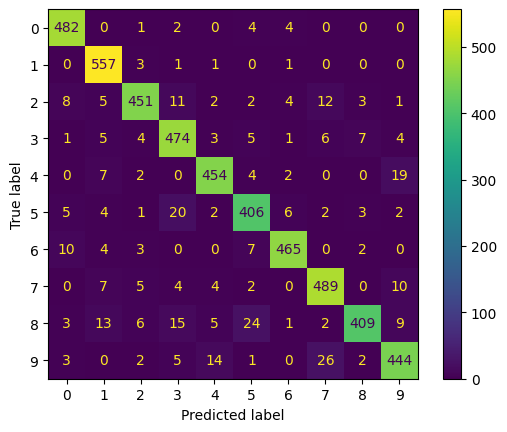

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_rp_knn.pkl','wb') as file:
  pickle.dump(pipeline_rp_knn,file)

# RP_Random_Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import auc
# Define the pipeline with Random Projection and Random Forest
pipeline_rp_rf = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('random_forest', RandomForestClassifier(n_estimators=215))
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_rp_rf.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_rp_rf.predict(X_test_standardized)
y_pred_proba = pipeline_rp_rf.predict_proba(X_test_standardized)
# Binarize the test labels for AUC calculation
y_test_bin = label_binarize(y_test_reduced, classes=np.unique(y_train_full))
n_classes = y_test_bin.shape[1]

# Calculate the AUC for multiclass
auc_score = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')

# Calculate AUC for multiclass
y_test_bin = label_binarize(y_test_reduced, classes=np.unique(y_train_full))
n_classes = y_test_bin.shape[1]
y_pred_proba_bin = y_pred_proba

auc_score = roc_auc_score(y_test_bin, y_pred_proba_bin, multi_class='ovo', average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_values = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_bin[:, i])
    roc_auc_values[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_values[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_rp_rf.pkl','wb') as file:

  pickle.dump(pipeline_rp_rf,file)

# RP_Decision_Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
from time import time
from numpy import linspace, interp

# Binarize the output labels for multiclass ROC AUC calculation
y_test_bin = label_binarize(y_test_reduced, classes=np.unique(y_train_full))
n_classes = y_test_bin.shape[1]

# Define the pipeline with Random Projection and Decision Tree
pipeline_rp_dt = Pipeline([
    ('random_projection', GaussianRandomProjection(n_components=215)),
    ('decision_tree', DecisionTreeClassifier())
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_rp_dt.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_rp_dt.predict(X_test_standardized)
y_pred_proba = pipeline_rp_dt.predict_proba(X_test_standardized)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')
auc_score = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_values = dict()
all_fpr = linspace(0, 1, 100)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_values[i] = auc(fpr[i], tpr[i])
    # Interpolate all ROC curves at these points
    interp_tpr = interp(all_fpr, fpr[i], tpr[i])
    # Set to zero beyond max
    interp_tpr[all_fpr > fpr[i][-1]] = 0
    tpr[i] = interp_tpr


# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'pink', 'yellow', 'purple', 'brown'])

# Plot ROC curves for all classes
for i, color in zip(range(n_classes), colors):
    plt.plot(all_fpr, tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_values[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [ ]:
with open('/content/drive/My Drive/PCA_RP/pipeline_rp_dt.pkl','wb') as file:
  pickle.dump(pipeline_rp_dt,file)

# t-SNE on MNIST

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
from time import time
from numpy import linspace, interp

# Define the pipeline with Sparse Random Projection and Decision Tree
pipeline_srp_dt = Pipeline([
    ('sparse_random_projection', SparseRandomProjection(n_components=215)),
    ('decision_tree', DecisionTreeClassifier())
])

# Start timing
start_time = time()

# Train the pipeline on the standardized training data with the full training labels
pipeline_srp_dt.fit(X_train_standardized, y_train_full)

# Calculate the time taken and print it
training_time = time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the standardized test set with the reduced test labels
y_pred = pipeline_srp_dt.predict(X_test_standardized)
y_pred_proba = pipeline_srp_dt.predict_proba(X_test_standardized)

# Calculate performance metrics
accuracy = accuracy_score(y_test_reduced, y_pred)
conf_matrix = confusion_matrix(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred, average='weighted')
recall = recall_score(y_test_reduced, y_pred, average='weighted')
f1 = f1_score(y_test_reduced, y_pred, average='weighted')
y_test_bin = label_binarize(y_test_reduced, classes=np.unique(y_train_full))
n_classes = y_test_bin.shape[1]
auc_score = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovo', average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training time: 19.52 seconds
Accuracy: 0.7228
Confusion Matrix:
 [[397   1  15  12  12  11  23   6  10   6]
 [  1 520  10   7   4   2   0   5  10   4]
 [ 12  10 332  25  19  14  23  12  29  23]
 [ 12   5  31 337  11  40   8  11  38  17]
 [  8   4  15   3 330  19  23   9  23  54]
 [ 19   6  16  35  11 279  15  11  42  17]
 [  9   7  18  18  15  22 369   4  16  13]
 [  8   4  16  10  15   9   5 405  10  39]
 [  6  11  25  42  20  37   8  12 302  24]
 [  6   4   8  14  55   8   6  37  16 343]]
Precision: 0.7237
Recall: 0.7228
F1 Score: 0.7230


# t-SNE

In [ ]:
from sklearn.manifold import TSNE
import time

# Initialize t-SNE with default parameters
tsne = TSNE(random_state=42)

# Apply t-SNE on the dataset with 784 features
start_time_784_tsne = time.time()
X_tsne_784 = tsne.fit_transform(X_train_standardized)
end_time_784_tsne = time.time()
time_784_tsne = end_time_784_tsne - start_time_784_tsne
print(f"Time taken for t-SNE with 784 features: {time_784_tsne:.2f} seconds")

# Apply t-SNE on the dataset with 215 features
start_time_215_tsne = time.time()
X_tsne_215 = tsne.fit_transform(X_train_pca_215)
end_time_215_tsne = time.time()
time_215_tsne = end_time_215_tsne - start_time_215_tsne
print(f"Time taken for t-SNE with 215 features: {time_215_tsne:.2f} seconds")


Time taken for t-SNE with 784 features: 478.01 seconds


KeyboardInterrupt: 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import TransformerMixin

class TSNETransformer(TransformerMixin):
    def __init__(self, n_components=2, random_state=None):
        self.n_components = n_components
        self.random_state = random_state
        self.tsne = TSNE(n_components=n_components, random_state=random_state)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.tsne.fit_transform(X)

# Define the machine learning algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-NN': KNeighborsClassifier()
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('tsne', TSNETransformer(n_components=2, random_state=42)),
        ('classifier', model)
    ])
    pipelines[name] = pipeline

# Fit and evaluate each pipeline
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_pca_215, y_train_full)
    score = pipeline.score(X_test_pca_215, y_test_reduced)
    print(f"{name}: {score:.4f}")


Logistic Regression: 0.1126
SVM: 0.1166
Naive Bayes: 0.1126
Random Forest: 0.0954
Decision Tree: 0.0998
K-NN: 0.1042


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt

# Define the t-SNE transformer
tsne = TSNE(n_components=2, random_state=42)

# Define the machine learning algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-NN': KNeighborsClassifier()
}

# Create and train pipelines for each algorithm
pipelines = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('tsne', tsne),
        ('classifier', model)
    ])
    start_time = time.time()
    pipeline.fit(X_train_pca_215, y_train_full)
    end_time = time.time()
    time_taken = end_time - start_time

    # Evaluate performance metrics
    y_pred = pipeline.predict(X_test_pca_215)
    accuracy = accuracy_score(y_test_reduced, y_pred)
    precision = precision_score(y_test_reduced, y_pred, average='weighted')
    recall = recall_score(y_test_reduced, y_pred, average='weighted')
    f1 = f1_score(y_test_reduced, y_pred, average='weighted')
    cm = confusion_matrix(y_test_reduced, y_pred)

    # Print performance metrics
    print(f"Algorithm: {name}")
    print(f"Training and Testing Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Time taken: {time_taken:.2f} seconds\n")

    # Plotting the graph of training and testing accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(pipeline.named_steps['tsne'].embedding_[:, 0], pipeline.named_steps['tsne'].embedding_[:, 1], 'o', markersize=3, label='Dataset')
    plt.title(f"t-SNE with {name}")
    plt.legend()
    plt.show()


In [ ]:
# Initialize lists to store results
results = []
training_times = []

# Iterate over each model pipeline
for name, pipeline in pipelines.items():
    start_time = time.time()
    pipeline.fit(X_train_pca_215, y_train_full)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Predict labels for training and testing data
    y_train_pred = pipeline.predict(X_train_pca_215)
    y_test_pred = pipeline.predict(X_test_pca_215)

    # Calculate performance metrics
    train_accuracy = accuracy_score(y_train_full, y_train_pred)
    test_accuracy = accuracy_score(y_test_reduced, y_test_pred)
    confusion_mat = confusion_matrix(y_test_reduced, y_test_pred)
    precision = precision_score(y_test_reduced, y_test_pred, average='weighted')
    recall = recall_score(y_test_reduced, y_test_pred, average='weighted')
    f1 = f1_score(y_test_reduced, y_test_pred, average='weighted')

    results.append({
        'model': name,
        'Training Accuracy (%)': train_accuracy * 100,
        'Testing Accuracy (%)': test_accuracy * 100,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Training Time (s)': training_time
    })

    # Plotting the t-SNE transformed data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne_215[:, 0], X_tsne_215[:, 1], c=y_train_full, cmap='jet', marker='o')
    plt.title(f'{name} with t-SNE')
    plt.colorbar(label='Digit Label')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.show()

# Display the results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df['model'], results_df['Training Accuracy (%)'], alpha=0.7, label='Training Accuracy')
plt.bar(results_df['model'], results_df['Testing Accuracy (%)'], alpha=0.7, label='Testing Accuracy')
plt.xlabel('model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of model with t-SNE')
plt.legend()
plt.show()


# t-SNE on MNIST

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to the standardized MNIST dataset
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_standardized)

# Save the reduced dataset
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'wb') as f:
    pickle.dump(X_train_tsne, f)


# t-sne + SVM

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC

# Load the t-SNE-reduced dataset
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



Training Accuracy: 0.8581666666666666
Testing Accuracy: 0.8531666666666666
Precision: 0.8611279692775
Recall: 0.8531666666666666
F1 Score: 0.8518561776948732
Confusion Matrix:
 [[566   0   7   2   0   3  10   0   4   0]
 [  0 666   2   0   2   0   3   1   1   0]
 [ 10   9 512  25  17   1  13   2   8   2]
 [  2   3  10 563   2   6   2   5  17   2]
 [  2  10   8   1 512   5   5   1   0  41]
 [  9   3   4 183   2 311  22   3   2   2]
 [ 17   3   9   3   1  16 539   0   1   0]
 [  0   9  10   0   7   0   0 516   3  80]
 [  7  14   2  62   6  32  10   1 446   5]
 [  0   0   3  12  31   1   0  61   1 488]]


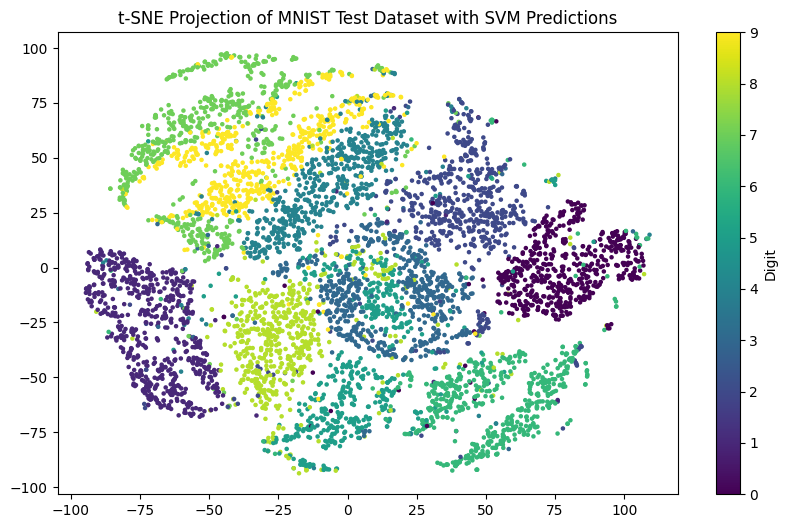

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Projection of MNIST Test Dataset with SVM Predictions')
plt.show()


# t-sne + NB

Training Accuracy: 0.7952916666666666
Testing Accuracy: 0.7855
Precision: 0.7834314320469435
Recall: 0.7855
F1 Score: 0.7802619239209192
Confusion Matrix:
 [[572   2   5   0   1   3   6   0   3   0]
 [  0 664   1   0   3   0   3   1   3   0]
 [ 17   6 484   9  25   1  40   1  13   3]
 [  1   4  23 425  36  50  24   3  45   1]
 [  1  10  14   0 497   5   4  17  21  16]
 [  2   4  11 164   6 314  21   2  15   2]
 [ 18   3  11   1   1  19 534   0   2   0]
 [  0  13  10   0  12   0   1 477   7 105]
 [  6  10   4  51   8  23   9   2 469   3]
 [  0   2   6   5  75   2   1 222   7 277]]


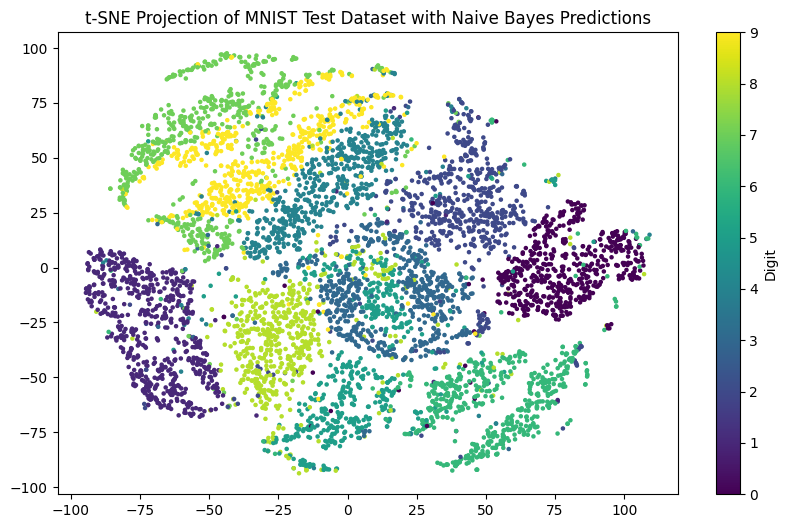

In [ ]:
from sklearn.naive_bayes import GaussianNB

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Projection of MNIST Test Dataset with Naive Bayes Predictions')
plt.show()


# t-sne + RF

Training Accuracy: 0.9999583333333333
Testing Accuracy: 0.9201666666666667
Precision: 0.9201788824418983
Recall: 0.9201666666666667
F1 Score: 0.9199893497815446
Confusion Matrix:
 [[573   0   3   1   0   2   8   0   5   0]
 [  0 665   2   0   2   0   3   2   1   0]
 [  6   4 542  11   7   0   9   7  10   3]
 [  1   3  13 558   2  18   2   4  10   1]
 [  0   6   7   2 529   4   5   1   1  30]
 [  2   1   4  26   0 481  12   2  11   2]
 [  7   3   2   1   2   6 563   1   4   0]
 [  0   7   8   3   4   0   0 568   3  32]
 [  6   7   4  15   5  29   7   3 504   5]
 [  0   0   3   8  17   3   0  25   3 538]]


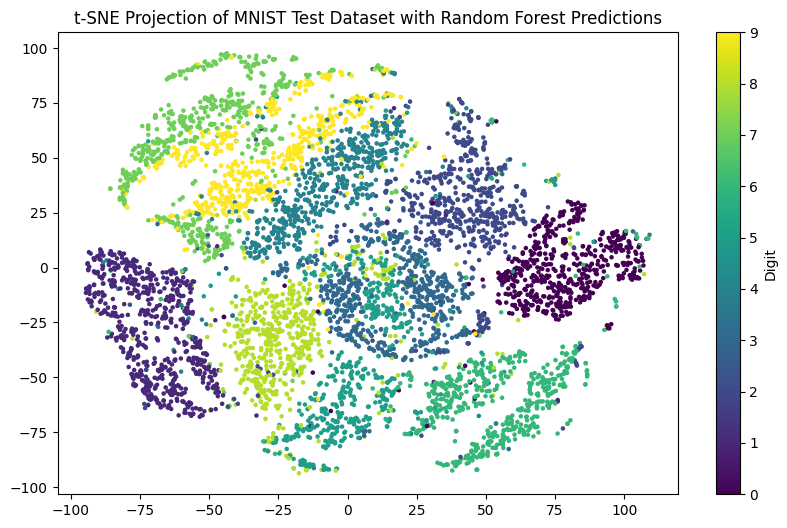

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Projection of MNIST Test Dataset with Random Forest Predictions')
plt.show()


# t-sne + DT

Training Accuracy: 1.0
Testing Accuracy: 0.8933333333333333
Precision: 0.8934644718944061
Recall: 0.8933333333333333
F1 Score: 0.8933160606214894
Confusion Matrix:
 [[560   0   4   1   0   5  14   2   4   2]
 [  0 644   1   2   5   0   5   9   9   0]
 [  7   5 526  13  13   3  10   7  13   2]
 [  0   6  15 528   4  24   6   5  20   4]
 [  0   8   7   5 516   8   5   3   3  30]
 [  2   1   7  28   2 463  15   2  18   3]
 [  9   3   3   1   5  11 554   0   3   0]
 [  0   6  10   7   7   0   0 546   5  44]
 [  5   5  12  20   7  21   4   5 503   3]
 [  0   1   2  11  26   2   0  27   8 520]]


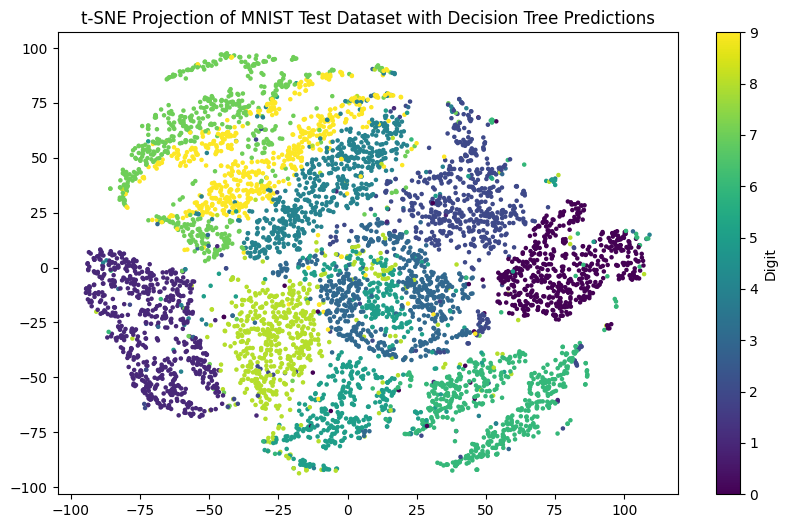

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Projection of MNIST Test Dataset with Decision Tree Predictions')
plt.show()


# t-sne + KNN

Training Accuracy: 0.93775
Testing Accuracy: 0.9141666666666667
Precision: 0.9141514206252468
Recall: 0.9141666666666667
F1 Score: 0.9138831078796101
Confusion Matrix:
 [[574   0   3   1   0   2   6   0   6   0]
 [  0 664   2   1   1   0   3   2   2   0]
 [  5   5 538  13   2   2  12  10   9   3]
 [  0   3  11 560   2  21   3   4   7   1]
 [  0   8  10   0 524   4   4   1   2  32]
 [  2   2   3  30   3 473  10   3  13   2]
 [  8   3   4   1   2   6 562   1   2   0]
 [  0   7  11   1   8   0   0 566   3  29]
 [  7   8   5  16   5  36   9   3 490   6]
 [  0   0   3   6  24   3   0  25   2 534]]


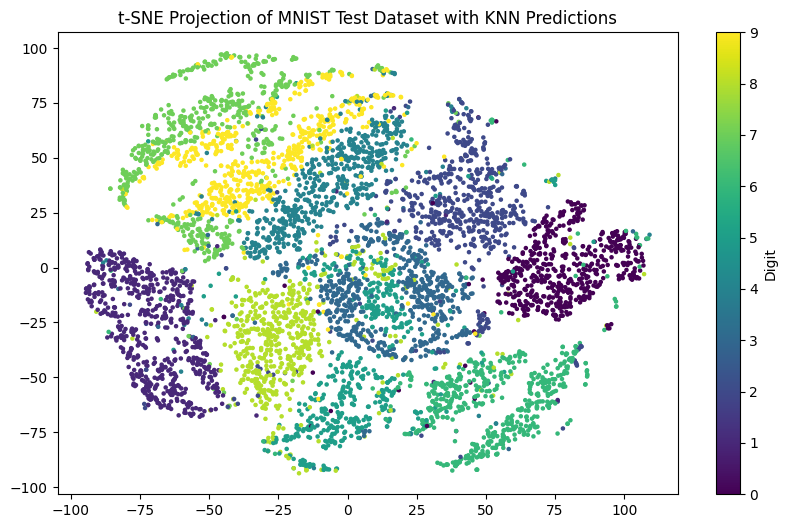

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Projection of MNIST Test Dataset with KNN Predictions')
plt.show()


# t-sne + LR

Training Accuracy: 0.8038333333333333
Testing Accuracy: 0.7955
Precision: 0.7928636779658499
Recall: 0.7955
F1 Score: 0.7931023768376485
Confusion Matrix:
 [[573   0   6   0   0   4   5   0   4   0]
 [  0 666   1   1   2   0   3   0   1   1]
 [ 19   6 488   8  25   7  29   0  13   4]
 [  1   3  13 432  20  79  10   1  48   5]
 [  2  10   9   0 517   4   5   8   1  29]
 [  8   3   4 159   7 318  21   1  17   3]
 [ 18   3  10   1   2  15 538   0   2   0]
 [  0   8   8   0   9   0   1 426   5 168]
 [  7  11   3  45   8  27   9   1 469   5]
 [  0   0   4   5  40   2   1 193   6 346]]


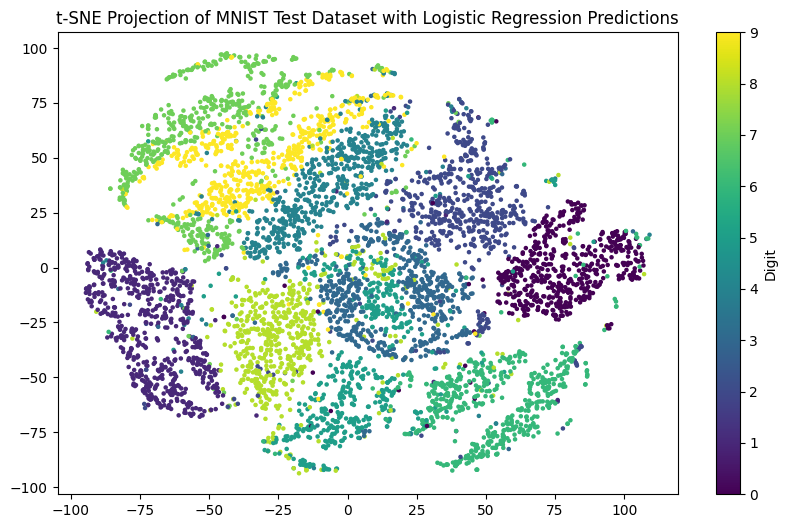

In [ ]:
from sklearn.linear_model import LogisticRegression

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Projection of MNIST Test Dataset with Logistic Regression Predictions')
plt.show()


Training Accuracy: 0.8038333333333333
Testing Accuracy: 0.7955
Precision: 0.7928636779658499
Recall: 0.7955
F1 Score: 0.7931023768376485
Confusion Matrix:
 [[573   0   6   0   0   4   5   0   4   0]
 [  0 666   1   1   2   0   3   0   1   1]
 [ 19   6 488   8  25   7  29   0  13   4]
 [  1   3  13 432  20  79  10   1  48   5]
 [  2  10   9   0 517   4   5   8   1  29]
 [  8   3   4 159   7 318  21   1  17   3]
 [ 18   3  10   1   2  15 538   0   2   0]
 [  0   8   8   0   9   0   1 426   5 168]
 [  7  11   3  45   8  27   9   1 469   5]
 [  0   0   4   5  40   2   1 193   6 346]]


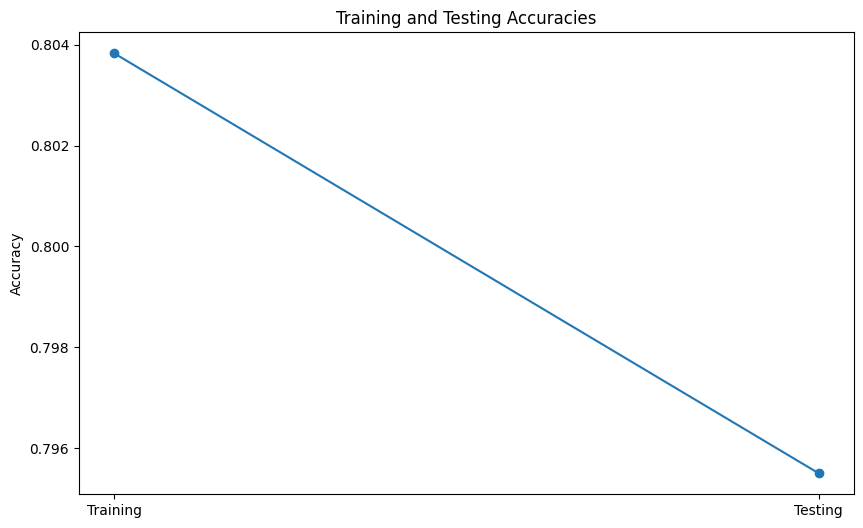

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tsne_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Plot the graph of training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot([1, 2], [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)], marker='o')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.show()


# UMAP on MNIST

In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=8a53903184f1b0dff8a872f4d97e9b7f7cc9a240b57833ebc5f5942282609f78
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


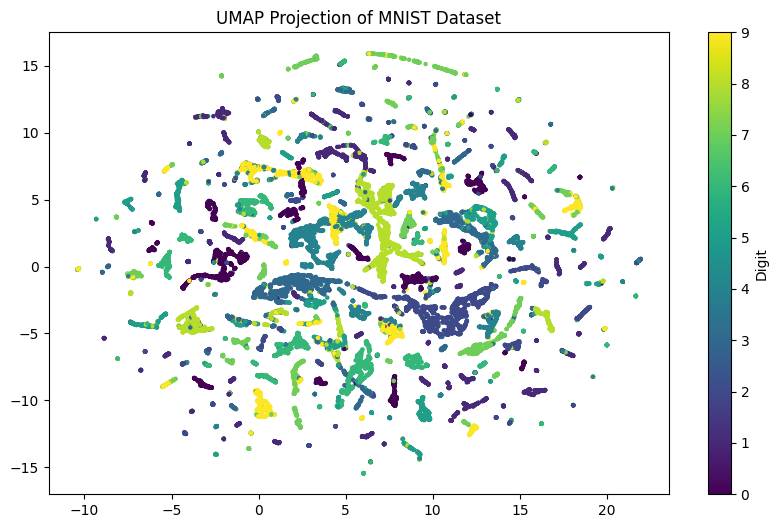

In [ ]:
import umap

with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Apply UMAP to further reduce the features to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_train_umap_reduced = umap_reducer.fit_transform(X_train_tsne_reduced)

# Plot the UMAP-reduced dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap_reduced[:, 0], X_train_umap_reduced[:, 1], c=y_train_full, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Dataset')
plt.show()


# UMAP + LR

In [ ]:
import umap

# If the t-SNE-reduced dataset is not already loaded
with open('/content/drive/MyDrive/mnist_tsne_reduced.pkl', 'rb') as f:
    X_train_tsne_reduced = pickle.load(f)

# Apply UMAP to further reduce the features to 215 dimensions
umap_reducer = umap.UMAP(n_components=215, random_state=42)
X_train_umap_reduced = umap_reducer.fit_transform(X_train_tsne_reduced)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_umap_reduced, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Training Accuracy: 0.891625
Testing Accuracy: 0.886
Precision: 0.8862161718409745
Recall: 0.886
F1 Score: 0.8854462756140877
Confusion Matrix:
 [[572   0   5   2   0   3   6   0   4   0]
 [  0 666   1   1   2   0   3   1   1   0]
 [  9   6 524  23   5   1  14   7   9   1]
 [  0   3  15 546   1  31   3   4   8   1]
 [  0  10  11   0 507   4   6   1   2  44]
 [  2   2   4  35   2 439  25   1  28   3]
 [  8   3   4   2   1   7 561   0   3   0]
 [  0   7   8   1  10   0   0 542   3  54]
 [  7  11   3  29   5  57  10   4 455   4]
 [  0   0   4   7  25   6   0  50   1 504]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


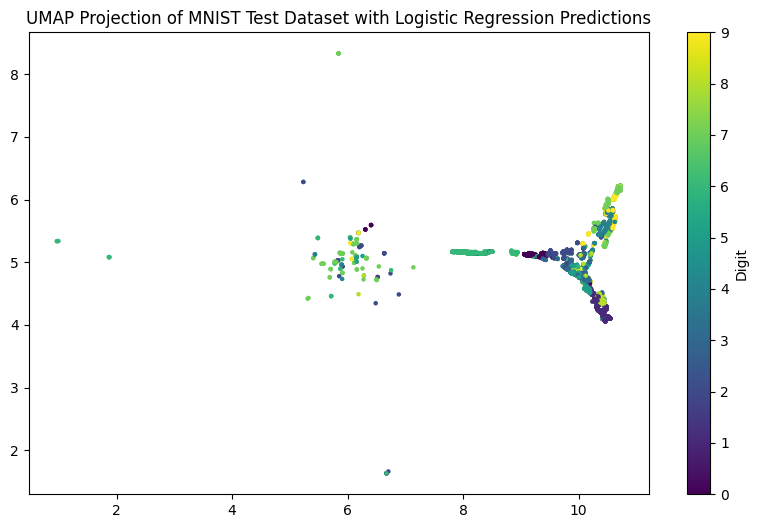

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Test Dataset with Logistic Regression Predictions')
plt.show()


# UMAP + SVM

In [ ]:
# Train the SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.8872083333333334
Testing Accuracy: 0.8803333333333333
Precision: 0.8821166617480245
Recall: 0.8803333333333333
F1 Score: 0.8800951797846791
Confusion Matrix:
 [[572   0   5   2   0   3   6   0   4   0]
 [  0 665   1   1   2   0   3   2   1   0]
 [  9   6 522  22   7   2  14   8   8   1]
 [  0   3  24 538   2  30   3   4   7   1]
 [  0  10  11   0 501   5   6   1   1  50]
 [  2   2   5  37   2 458  22   1   9   3]
 [  8   3   4   2   1  16 553   0   2   0]
 [  0   7   8   1  10   0   0 520   3  76]
 [  7  11   3  27   5  63   9   4 452   4]
 [  0   0   4   8  24   5   0  54   1 501]]


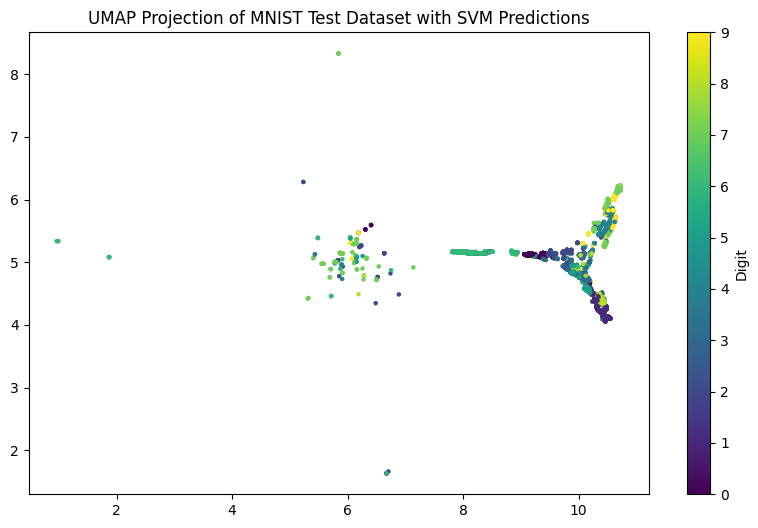

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Test Dataset with SVM Predictions')
plt.show()


# UMAP + NB

In [ ]:
# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.7729166666666667
Testing Accuracy: 0.7661666666666667
Precision: 0.7744889971631225
Recall: 0.7661666666666667
F1 Score: 0.7497374528455852
Confusion Matrix:
 [[568   0   1   2   0   3   4   9   5   0]
 [  0 666   1   1   3   0   3   0   1   0]
 [ 73  10 405  46  15   0  12  27   8   3]
 [ 17   3  12 552   6   7   3   3   7   2]
 [  1  10   7   0 481   5   5  20   0  56]
 [  2   2   3 180   2 311  22  11   4   4]
 [ 14   3   4   2   1  16 522  26   1   0]
 [  0   9   6   2  96   0   0 100   3 409]
 [  6  14   1  57   6  30   9   6 451   5]
 [  0   0   2  13  30   1   0   9   1 541]]


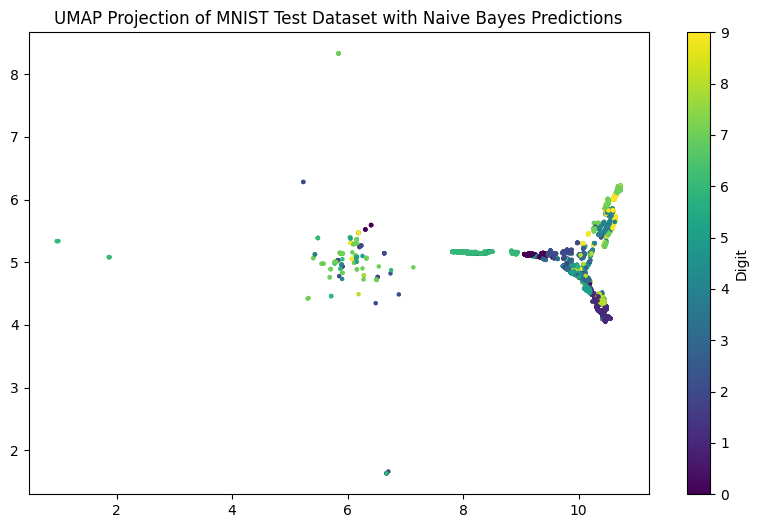

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Test Dataset with Naive Bayes Predictions')
plt.show()


# UMAP + RF

In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9999583333333333
Testing Accuracy: 0.9131666666666667
Precision: 0.9132492227827028
Recall: 0.9131666666666667
F1 Score: 0.9130504891317989
Confusion Matrix:
 [[570   0   4   2   0   3   9   0   4   0]
 [  0 659   5   1   3   0   3   2   2   0]
 [  2   5 539  13   8   0  10   8  11   3]
 [  0   4  13 556   2  20   3   4   6   4]
 [  0   9   8   0 522   4   7   1   3  31]
 [  2   1   4  24   1 474  11   2  18   4]
 [  3   3   6   1   3   8 562   1   2   0]
 [  0   7   7   1   5   0   0 564   3  38]
 [  7   6   4  16   6  28   7   3 504   4]
 [  0   0   3   6  18   4   0  34   3 529]]


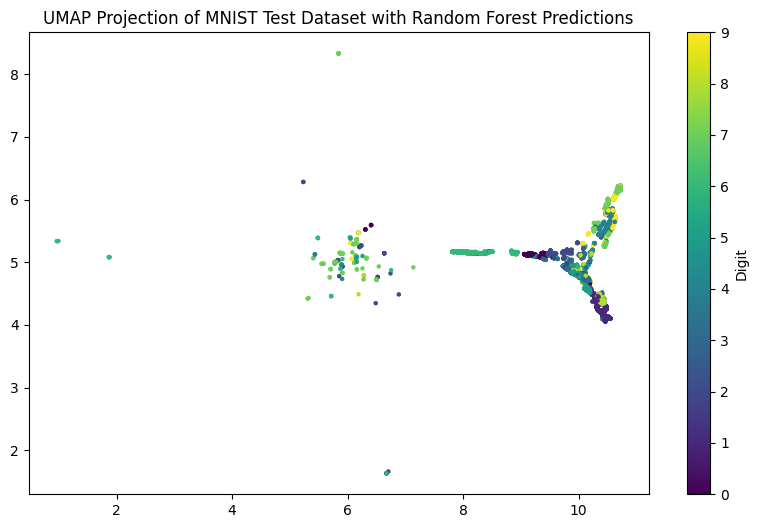

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Test Dataset with Random Forest Predictions')
plt.show()


# UMAP + DT

In [ ]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.8826666666666667
Precision: 0.8830891325397968
Recall: 0.8826666666666667
F1 Score: 0.8827972476120138
Confusion Matrix:
 [[559   0   6   5   0   6  12   0   3   1]
 [  1 635   7   2  10   0   3  10   5   2]
 [  3   9 518  13  16   1  10  10  15   4]
 [  1   3  13 534   1  31   2   5  18   4]
 [  0   7   7   5 505   8   3   3   3  44]
 [  4   1   3  28   0 456  15   5  25   4]
 [  9   2   9   4   3  15 541   1   5   0]
 [  0   5   4   4   6   1   0 560   2  43]
 [  7   6   6  16   9  25   8   3 497   8]
 [  0   0   3  11  29  10   0  46   7 491]]


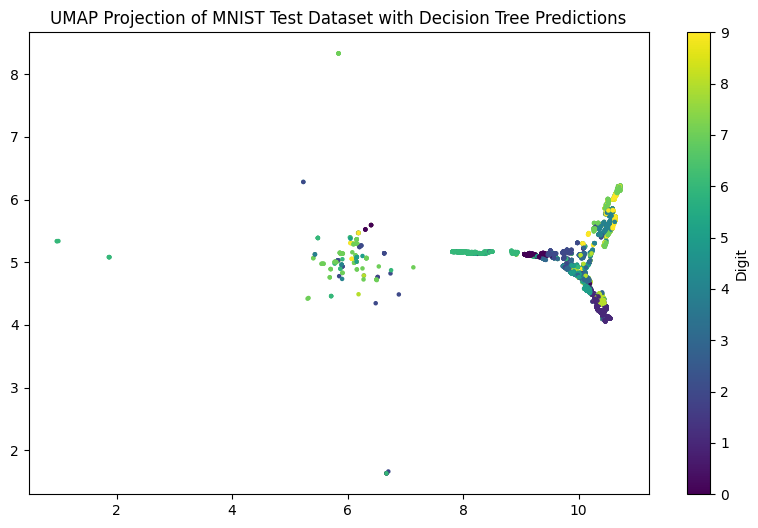

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Test Dataset with Decision Tree Predictions')
plt.show()


# UMAP + KNN

In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate and print the performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9216666666666666
Testing Accuracy: 0.9083333333333333
Precision: 0.9085488880006959
Recall: 0.9083333333333333
F1 Score: 0.9079694856905812
Confusion Matrix:
 [[571   0   5   1   0   2   8   0   5   0]
 [  0 666   2   1   1   0   3   1   1   0]
 [  9   6 533  14   2   6  10   8   9   2]
 [  0   3   9 563   2  16   3   4  10   2]
 [  0  10  13   1 509   6   6   1   0  39]
 [  2   2   4  34   1 469  13   3  11   2]
 [  8   3   5   1   1   6 564   0   1   0]
 [  0   7  11   0   7   0   0 566   3  31]
 [  6  11   3  21   5  38   9   3 485   4]
 [  0   0   5   5  21   7   0  30   5 524]]


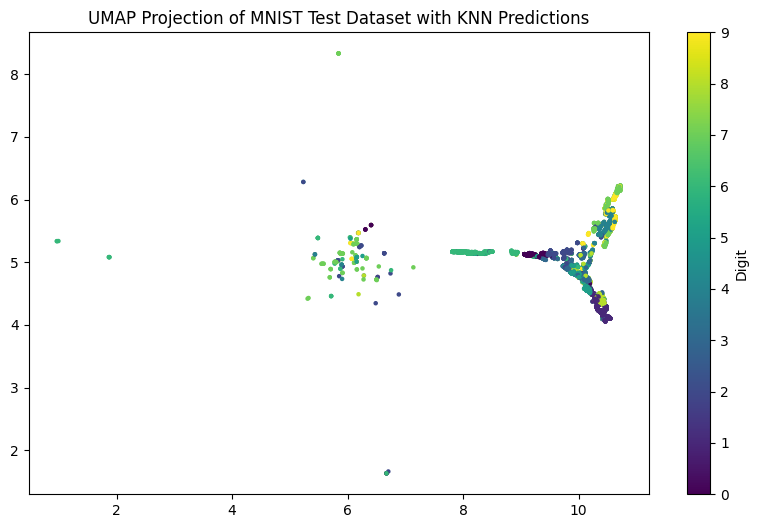

In [ ]:
# Plot the graph of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('UMAP Projection of MNIST Test Dataset with KNN Predictions')
plt.show()
